# VCB

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv('../../Dataset/VCB.csv')
df = data[['Date', 'Close']]
df.rename(columns={'Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
y = df['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
y_norm = scaler.fit_transform(y)

# Split data into train and test 
train_size = int(len(y_norm) * 0.8)
y_train, y_test = y_norm[:train_size], y_norm[train_size:]

# Create input and output sequences
def create_sequences(data, n_lookback, n_forecast):
    X, Y = [], []
    for i in range(n_lookback, len(data) - n_forecast + 1):
        X.append(data[i - n_lookback: i])
        Y.append(data[i: i + n_forecast])
    return np.array(X), np.array(Y)

n_lookback = 60
n_forecast = 1  # Predict time step
X_train, Y_train = create_sequences(y_train, n_lookback, n_forecast)
X_test, Y_test = create_sequences(y_test, n_lookback, n_forecast)

# Reshape data for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr = X_test.reshape(X_test.shape[0], -1)
Y_train_lr = Y_train.reshape(-1, 1)
Y_test_lr = Y_test.reshape(-1, 1)

# Build and train the model
model = LinearRegression()
model.fit(X_train_lr, Y_train_lr)

# Predict on the test set
Y_pred_test = model.predict(X_test_lr)
Y_pred_test = scaler.inverse_transform(Y_pred_test)  # Reshape to 2D before inverse transform

# Reshape Y_test before inverse transforming
Y_test = scaler.inverse_transform(Y_test_lr)

# Predict future 30, 60, 90 days
last_sequence = y_norm[-n_lookback:]
future_predictions = []
for i in range(90):
    next_pred = model.predict(last_sequence.reshape(1, -1))
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], next_pred)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

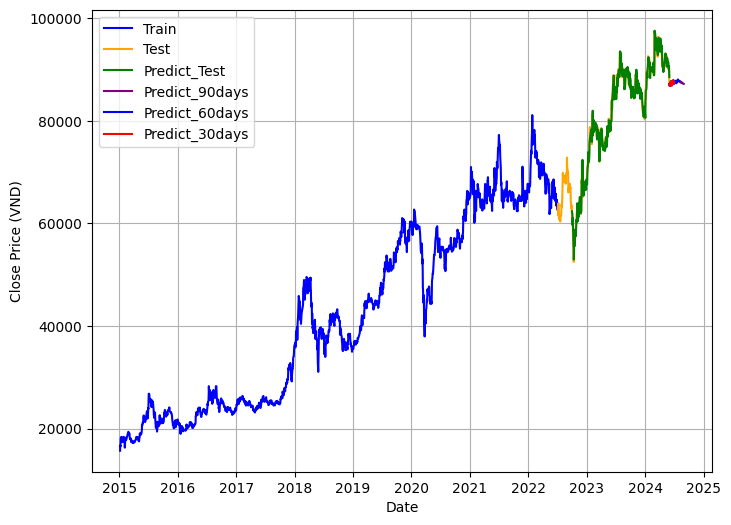

In [2]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot actual prices (All data)
plt.plot(df.index[:train_size], df['Price'][:train_size], label='Train', color='blue')

plt.plot(df.index[train_size:], df['Price'][train_size:], label='Test', color='orange')

# Plot predicted prices on the test set
test_data_start = df.index[train_size + n_lookback]
test_data_end = df.index[-1]
plt.plot(df.index[train_size + n_lookback: len(Y_pred_test) + train_size + n_lookback], Y_pred_test, label='Predict_Test', color='green')

# Plot predicted prices in the future
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
plt.plot(future_dates, future_predictions, label='Predict_90days', color='purple')
plt.plot(future_dates[:60], future_predictions[:60], label='Predict_60days', color='blue')
plt.plot(future_dates[:30], future_predictions[:30], label='Predict_30days', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# Create a new dataframe containing dates and future predicted values
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Print the forecast results for the next 90 days
print("Forecast VCB stock prices for the next 90 days:")
print(future_df)

Forecast VCB stock prices for the next 90 days:
                Forecast
Date                    
2024-06-01  87169.011141
2024-06-02  86863.308413
2024-06-03  87178.917151
2024-06-04  87346.253743
2024-06-05  87209.790786
...                  ...
2024-08-25  87264.508514
2024-08-26  87235.157307
2024-08-27  87211.351269
2024-08-28  87208.473143
2024-08-29  87203.388390

[90 rows x 1 columns]


In [4]:

# Calculate RMSE, MAPE, and MAE on the test set
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mae

rmse, mape, mae = calculate_metrics(Y_test, Y_pred_test)

print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MAE:', mae)

RMSE: 1211.8252201512614
MAPE: 1.1329370091070188 %
MAE: 897.4841498673198


# CTG

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv('../../Dataset/CTG.csv')
df = data[['Date', 'Close']]
df.rename(columns={'Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
y = df['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
y_norm = scaler.fit_transform(y)

# Split data into train and test 
train_size = int(len(y_norm) * 0.8)
y_train, y_test = y_norm[:train_size], y_norm[train_size:]

# Create input and output sequences
def create_sequences(data, n_lookback, n_forecast):
    X, Y = [], []
    for i in range(n_lookback, len(data) - n_forecast + 1):
        X.append(data[i - n_lookback: i])
        Y.append(data[i: i + n_forecast])
    return np.array(X), np.array(Y)

n_lookback = 60
n_forecast = 1  # Predict time step
X_train, Y_train = create_sequences(y_train, n_lookback, n_forecast)
X_test, Y_test = create_sequences(y_test, n_lookback, n_forecast)

# Reshape data for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr = X_test.reshape(X_test.shape[0], -1)
Y_train_lr = Y_train.reshape(-1, 1)
Y_test_lr = Y_test.reshape(-1, 1)

# Build and train the model
model = LinearRegression()
model.fit(X_train_lr, Y_train_lr)

# Predict on the test set
Y_pred_test = model.predict(X_test_lr)
Y_pred_test = scaler.inverse_transform(Y_pred_test)  # Reshape to 2D before inverse transform

# Reshape Y_test before inverse transforming
Y_test = scaler.inverse_transform(Y_test_lr)

# Predict future 30, 60, 90 days
last_sequence = y_norm[-n_lookback:]
future_predictions = []
for i in range(90):
    next_pred = model.predict(last_sequence.reshape(1, -1))
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], next_pred)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

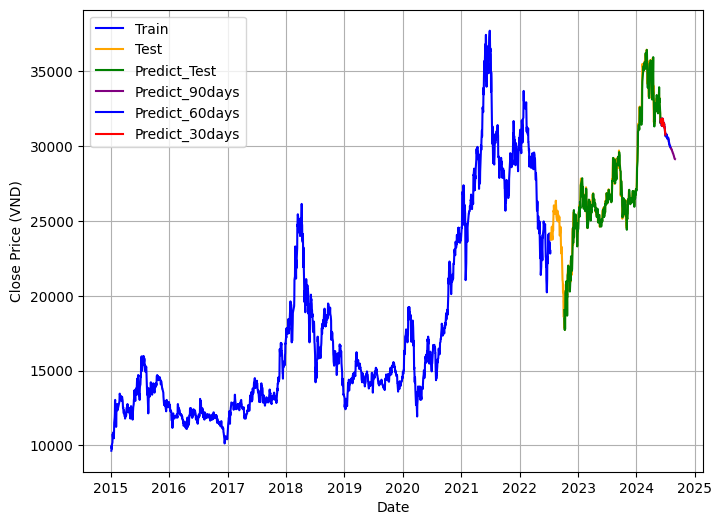

In [6]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot actual prices (All data)
plt.plot(df.index[:train_size], df['Price'][:train_size], label='Train', color='blue')

plt.plot(df.index[train_size:], df['Price'][train_size:], label='Test', color='orange')

# Plot predicted prices on the test set
test_data_start = df.index[train_size + n_lookback]
test_data_end = df.index[-1]
plt.plot(df.index[train_size + n_lookback: len(Y_pred_test) + train_size + n_lookback], Y_pred_test, label='Predict_Test', color='green')

# Plot predicted prices in the future
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
plt.plot(future_dates, future_predictions, label='Predict_90days', color='purple')
plt.plot(future_dates[:60], future_predictions[:60], label='Predict_60days', color='blue')
plt.plot(future_dates[:30], future_predictions[:30], label='Predict_30days', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Create a new dataframe containing dates and future predicted values
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Print the forecast results for the next 90 days
print("Forecast CTG stock prices for the next 90 days:")
print(future_df)

Forecast CTG stock prices for the next 90 days:
                Forecast
Date                    
2024-06-01  31635.172193
2024-06-02  31742.466145
2024-06-03  31639.880819
2024-06-04  31828.750831
2024-06-05  31829.704845
...                  ...
2024-08-25  29237.783607
2024-08-26  29192.777328
2024-08-27  29162.696087
2024-08-28  29142.547801
2024-08-29  29135.629291

[90 rows x 1 columns]


In [8]:

# Calculate RMSE, MAPE, and MAE on the test set
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mae

rmse, mape, mae = calculate_metrics(Y_test, Y_pred_test)

print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MAE:', mae)

RMSE: 548.0293594735301
MAPE: 1.466958224643832 %
MAE: 394.2402904045775


# BID

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv('../../Dataset/BID.csv')
df = data[['Date', 'Close']]
df.rename(columns={'Close': 'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
y = df['Price'].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
y_norm = scaler.fit_transform(y)

# Split data into train and test
train_size = int(len(y_norm) * 0.8)
y_train, y_test = y_norm[:train_size], y_norm[train_size:]

# Create input and output sequences
def create_sequences(data, n_lookback, n_forecast):
    X, Y = [], []
    for i in range(n_lookback, len(data) - n_forecast + 1):
        X.append(data[i - n_lookback: i])
        Y.append(data[i: i + n_forecast])
    return np.array(X), np.array(Y)

n_lookback = 60
n_forecast = 1  # Predict time step
X_train, Y_train = create_sequences(y_train, n_lookback, n_forecast)
X_test, Y_test = create_sequences(y_test, n_lookback, n_forecast)

# Reshape data for Linear Regression
X_train_lr = X_train.reshape(X_train.shape[0], -1)
X_test_lr = X_test.reshape(X_test.shape[0], -1)
Y_train_lr = Y_train.reshape(-1, 1)
Y_test_lr = Y_test.reshape(-1, 1)

# Build and train the model
model = LinearRegression()
model.fit(X_train_lr, Y_train_lr)

# Predict on the test set
Y_pred_test = model.predict(X_test_lr)
Y_pred_test = scaler.inverse_transform(Y_pred_test)  # Reshape to 2D before inverse transform

# Reshape Y_test before inverse transforming
Y_test = scaler.inverse_transform(Y_test_lr)

# Predict future 30, 60, 90 days
last_sequence = y_norm[-n_lookback:]
future_predictions = []
for i in range(90):
    next_pred = model.predict(last_sequence.reshape(1, -1))
    future_predictions.append(next_pred)
    last_sequence = np.append(last_sequence[1:], next_pred)
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

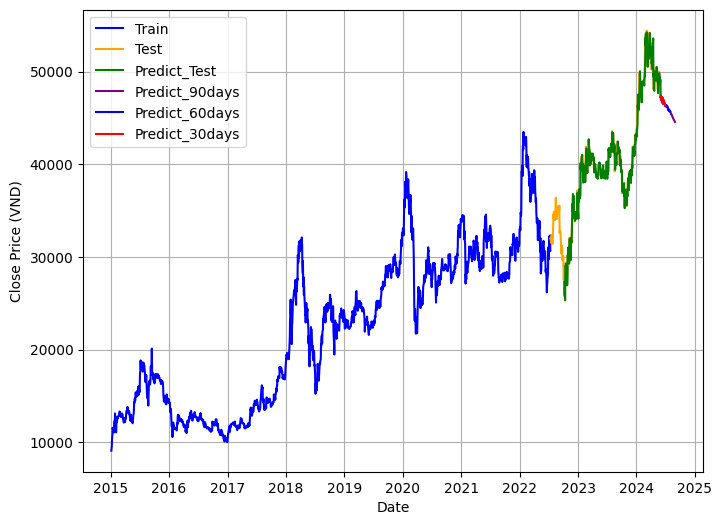

In [10]:
# Visualization
plt.figure(figsize=(8, 6))

# Plot actual prices (All data)
plt.plot(df.index[:train_size], df['Price'][:train_size], label='Train', color='blue')

plt.plot(df.index[train_size:], df['Price'][train_size:], label='Test', color='orange')

# Plot predicted prices on the test set
test_data_start = df.index[train_size + n_lookback]
test_data_end = df.index[-1]
plt.plot(df.index[train_size + n_lookback: len(Y_pred_test) + train_size + n_lookback], Y_pred_test, label='Predict_Test', color='green')

# Plot predicted prices in the future
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
plt.plot(future_dates, future_predictions, label='Predict_90days', color='purple')
plt.plot(future_dates[:60], future_predictions[:60], label='Predict_60days', color='blue')
plt.plot(future_dates[:30], future_predictions[:30], label='Predict_30days', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price (VND)')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# Create a new dataframe containing dates and future predicted values
future_dates = pd.date_range(start=df.index[-1], periods=91)[1:]
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_predictions.flatten()})
future_df.set_index('Date', inplace=True)

# Print the forecast results for the next 90 days
print("Forecast BID stock prices for the next 90 days:")
print(future_df)

Forecast BID stock prices for the next 90 days:
                Forecast
Date                    
2024-06-01  47241.381239
2024-06-02  47291.410425
2024-06-03  47292.097955
2024-06-04  47311.763635
2024-06-05  46993.463587
...                  ...
2024-08-25  44699.085985
2024-08-26  44672.963407
2024-08-27  44616.893806
2024-08-28  44590.550149
2024-08-29  44559.903574

[90 rows x 1 columns]


In [12]:

# Calculate RMSE, MAPE, and MAE on the test set
def calculate_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    mae = mean_absolute_error(y_true, y_pred)
    return rmse, mape, mae

rmse, mape, mae = calculate_metrics(Y_test, Y_pred_test)

print('RMSE:', rmse)
print('MAPE:', mape, '%')
print('MAE:', mae)

RMSE: 820.4744826034911
MAPE: 1.485249404587455 %
MAE: 593.1216656358844
